<a href="https://colab.research.google.com/github/sheoranabhishek/predictor_covid19/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('covid.csv')

In [4]:
df.head()

iso_code continent  ... hospital_beds_per_thousand life_expectancy
0      AFG      Asia  ...                        0.5           64.83
1      AFG      Asia  ...                        0.5           64.83
2      AFG      Asia  ...                        0.5           64.83
3      AFG      Asia  ...                        0.5           64.83
4      AFG      Asia  ...                        0.5           64.83

[5 rows x 40 columns]

In [5]:
df.shape

(40959, 40)

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [7]:
df['location'].value_counts()

Afghanistan           246
Bahrain               246
Dominican Republic    246
Iceland               246
Thailand              246
                     ... 
Western Sahara        129
Tajikistan            124
Comoros               123
Lesotho               110
Hong Kong              18
Name: location, Length: 212, dtype: int64

In [8]:
df.isna().any()

iso_code                            True
continent                           True
location                           False
date                               False
total_cases                         True
new_cases                           True
new_cases_smoothed                  True
total_deaths                        True
new_deaths                          True
new_deaths_smoothed                 True
total_cases_per_million             True
new_cases_per_million               True
new_cases_smoothed_per_million      True
total_deaths_per_million            True
new_deaths_per_million              True
new_deaths_smoothed_per_million     True
new_tests                           True
total_tests                         True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_per_case                      True
positive_rate                       True
tests_units     

In [ ]:
df.isna().sum()

iso_code                             246
continent                            492
location                               0
date                                   0
total_cases                          575
new_cases                            757
new_cases_smoothed                  1539
total_deaths                         575
new_deaths                           757
new_deaths_smoothed                 1539
total_cases_per_million              821
new_cases_per_million                821
new_cases_smoothed_per_million      1604
total_deaths_per_million             821
new_deaths_per_million               821
new_deaths_smoothed_per_million     1604
new_tests                          27847
total_tests                        27516
total_tests_per_thousand           27516
new_tests_per_thousand             27847
new_tests_smoothed                 26217
new_tests_smoothed_per_thousand    26217
tests_per_case                     27329
positive_rate                      26973
tests_units     

In [ ]:
df.describe(include="O")

iso_code continent     location       date      tests_units
count     40713     40467        40959      40959            15497
unique      211         6          212        246                5
top         TWN    Europe  Philippines  8/10/2020  tests performed
freq        246     10896          246        212             8176

In [9]:
india_data = df[df['location']=='India']

In [ ]:
india_data.head()

iso_code continent  ... hospital_beds_per_thousand life_expectancy
17096      IND      Asia  ...                       0.53           69.66
17097      IND      Asia  ...                       0.53           69.66
17098      IND      Asia  ...                       0.53           69.66
17099      IND      Asia  ...                       0.53           69.66
17100      IND      Asia  ...                       0.53           69.66

[5 rows x 40 columns]

In [ ]:
india_data.tail()

iso_code continent  ... hospital_beds_per_thousand life_expectancy
17337      IND      Asia  ...                       0.53           69.66
17338      IND      Asia  ...                       0.53           69.66
17339      IND      Asia  ...                       0.53           69.66
17340      IND      Asia  ...                       0.53           69.66
17341      IND      Asia  ...                       0.53           69.66

[5 rows x 40 columns]

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


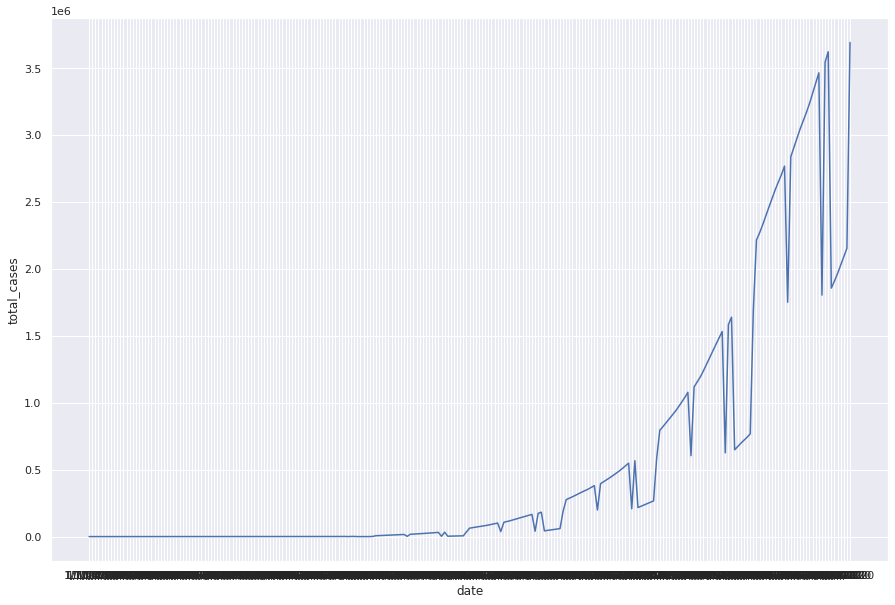

In [11]:
#Total cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_cases',data=india_data)
plt.show()

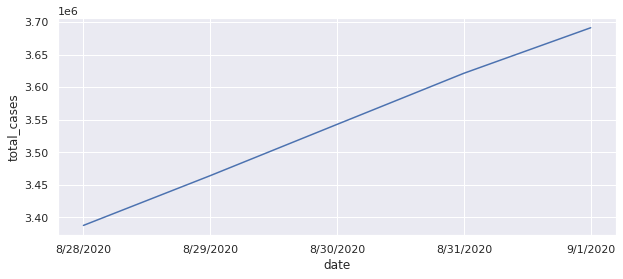

In [ ]:
#Visualizing the last 5 days data
last_5_days = india_data.tail()
sns.set(rc={'figure.figsize':(10,4)})
sns.lineplot(x='date',y='total_cases',data=last_5_days)
plt.show()


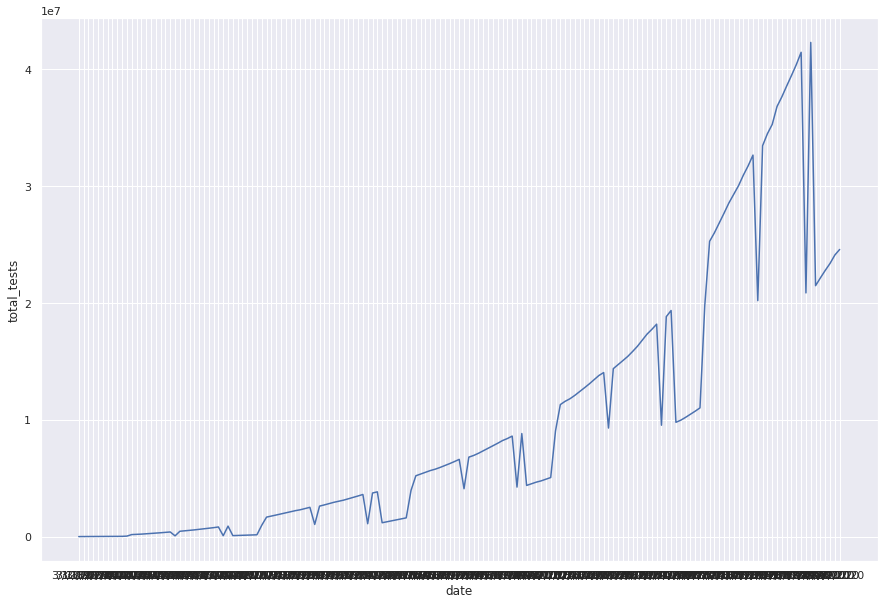

In [ ]:
#Total tests per day (entire covid period)
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_tests',data=india_data)
plt.show()

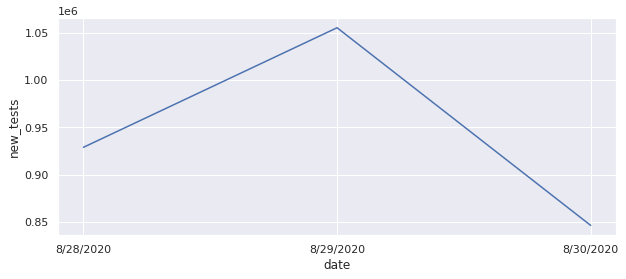

In [ ]:
#Tests in last 5 days
sns.set(rc={'figure.figsize':(10,4)})
sns.lineplot(x='date',y='new_tests',data=last_5_days)
plt.show()


In [ ]:
india_data.head()

iso_code continent  ... hospital_beds_per_thousand life_expectancy
17096      IND      Asia  ...                       0.53           69.66
17097      IND      Asia  ...                       0.53           69.66
17098      IND      Asia  ...                       0.53           69.66
17099      IND      Asia  ...                       0.53           69.66
17100      IND      Asia  ...                       0.53           69.66

[5 rows x 40 columns]

In [12]:
from sklearn.model_selection import train_test_split

In [ ]:
#Implementing Linear Regression


In [13]:
#string date to date time object
import datetime as dt
india_data['date'] = pd.to_datetime(india_data['date'])
india_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


iso_code continent  ... hospital_beds_per_thousand life_expectancy
17096      IND      Asia  ...                       0.53           69.66
17097      IND      Asia  ...                       0.53           69.66
17098      IND      Asia  ...                       0.53           69.66
17099      IND      Asia  ...                       0.53           69.66
17100      IND      Asia  ...                       0.53           69.66

[5 rows x 40 columns]

In [14]:
india_data['date'] = india_data['date'].map(dt.datetime.toordinal)
india_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


iso_code continent  ... hospital_beds_per_thousand  life_expectancy
17096      IND      Asia  ...                       0.53            69.66
17097      IND      Asia  ...                       0.53            69.66
17098      IND      Asia  ...                       0.53            69.66
17099      IND      Asia  ...                       0.53            69.66
17100      IND      Asia  ...                       0.53            69.66

[5 rows x 40 columns]

In [15]:
india_data.fillna(0)
india_data_temp  = india_data.dropna(axis=0,subset=['total_cases'])

In [16]:
#train_test_split
x1 = india_data_temp['date']
y1 = india_data_temp['total_cases']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3)

In [17]:
india_data_temp['total_cases'].isna().sum()

0

In [18]:
from sklearn.linear_model import LinearRegression

#initializing the model

total_case_model = LinearRegression()

In [19]:
x1_train = np.array(x1_train).reshape(-1,1)
y1_train = np.array(y1_train).reshape(-1,1)

In [20]:
np.isnan(y1_train)
np.nan_to_num(y1_train)

array([[9.616900e+04],
       [0.000000e+00],
       [1.905350e+05],
       [1.638870e+06],
       [2.767273e+06],
       [9.000000e+01],
       [3.100000e+01],
       [7.196650e+05],
       [2.461190e+06],
       [3.000000e+00],
       [2.943500e+04],
       [9.688760e+05],
       [3.106348e+06],
       [1.336861e+06],
       [2.975350e+05],
       [3.805320e+05],
       [5.000000e+01],
       [4.643300e+04],
       [6.412000e+03],
       [1.250000e+02],
       [0.000000e+00],
       [2.027074e+06],
       [2.526192e+06],
       [3.669460e+05],
       [3.133200e+04],
       [2.649600e+04],
       [3.200000e+02],
       [0.000000e+00],
       [3.000000e+00],
       [2.665980e+05],
       [3.234474e+06],
       [3.000000e+00],
       [7.800300e+04],
       [5.288590e+05],
       [3.000000e+00],
       [1.184470e+05],
       [1.370000e+02],
       [7.240000e+02],
       [1.517670e+05],
       [2.268675e+06],
       [1.650000e+02],
       [2.702742e+06],
       [1.003832e+06],
       [0.0

In [21]:
np.isnan(y1_train).sum()

0

In [23]:
total_case_model.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
x1_test = np.array(x1_test).reshape(-1,1)

y_pred = total_case_model.predict(x1_test)

In [25]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y1_test,y_pred)

281398595466.469

In [26]:
from sklearn.metrics import r2_score
r2_score(y1_test,y_pred)

0.5381201996348017

In [27]:
india_data_temp.shape

(245, 40)

In [28]:
from sklearn.externals import joblib

joblib.dump(total_case_model,'Basic_Model_1.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Basic_Model_1.pkl']

In [35]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01)
rr.fit(x1_train,y1_train);

joblib.dump(rr,"total_case_model.pkl")

['total_case_model.pkl']

In [30]:
rr_train_score = rr.score(x1_train,y1_train)
print(rr_train_score*100)
rr_test_score = rr.score(x1_test,y1_test)
print(rr_test_score*100)

59.74823715690422
53.812020254981704


In [31]:
rr100 = Ridge(alpha=100)
rr100.fit(x1_train,y1_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
rr100_train_score = rr100.score(x1_train,y1_train)
print(rr100_train_score*100)
rr_100_test_score = rr100.score(x1_test,y1_test)
print(rr_test_score*100)
 

59.74823639934754
53.812020254981704


737678
